<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-97/blob/main/semana4/actividad-semana4-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *   Nombre de la entrega: Actividad Semanal -- 4
# *   Nombre: Oscar Villa Cardenas
# *   Matricula: A01794052
# *   Materia: Ciencia y Analitica
# *   Profesor: Jobish Vallikavungal Devassia
# *   Fecha: 2022-10-05

In [2]:
import pandas as pd
import numpy as np

# Principal components analysis (PCA) 

* Es un metodo util para la reduccion de la dimension, especialmente cuando el numero de la variables es demasiado largo.
* Se pretende que PCA se utilize con variables numericas. 
   * Para variables categoricas, otros metodos como correspondence analysis son mas adecuados. 

In [3]:
customers_default_payments = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [4]:
customers_default_payments_df = pd.read_csv(customers_default_payments)
df = customers_default_payments_df.copy()
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [5]:
df.shape

(30000, 25)

Por cada cereal, los datos incluyen 13 variables numericas, y nosotros estamos interesados en reducir esta dimension.

Principal Component Analysis puede decirte que variables en tus datos son los mas importantes.

Nos enfocamos primero en dos variables: `X6` and consumer `X7`: 

In [64]:
ndf = df[['X6', 'X7']]
ndf.corr()

,X1,X5
X1,1.000000,0.144684
X5,0.144684,1.000000


In [58]:
df.X6.mean().round(2)

-0.02

In [59]:
df.X7.mean().round(2)

-0.13

In [85]:
X6Mean = df['X6'].mean()
df['X6'].fillna(value = X6Mean, 
                    inplace = True)
print(X6Mean)
df['X6'].skew()

-0.016634996833016634


0.7319021059472196

In [89]:
X7Mean = df['X7'].mean()
df['X7'].fillna(value = X7Mean, 
                    inplace = True)
print(X7Mean)
df['X7'].skew()

-0.13368894815802634


0.7904711273867346

In [90]:
Varience = np.cov([df.X6, df.X7])
Varience

array([[1.2628654 , 0.90424424],
       [0.90424424, 1.43317802]])

In [91]:
ndf = df[['X6','X7']]
ndf.var().sum()

2.6960434165961082

In [92]:
t= ndf.var().sum()
varC =Varience[0][0]
varR = Varience[1][1]

In [93]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of X6 \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of X7 \t:', ((varR/t)*100).round(2),'%' )

Total Varience 			: 2.7
Varience prop. of X6 	: 46.84 %
Varience prop. of X7 	: 53.16 %


In [94]:
import seaborn as sns

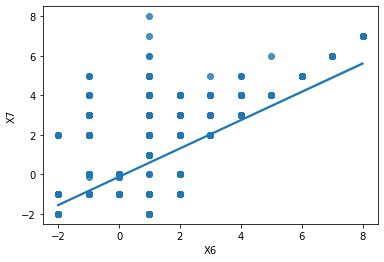

In [95]:
p = sns.regplot(data = df,  
                x = df.X6, 
                y = df.X7
               ) 
p

In [96]:
import numpy as np
from sklearn.decomposition import PCA

In [97]:
pcs = PCA(n_components=2)

pcs.fit(df[['X6', 'X7']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,1.502087,0.836881,0.836881
1,0.663157,0.163119,1.000000


In [98]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,1.50,0.66
Proportion of variance,0.84,0.16
Cumulative proportion,0.84,1.00


In [99]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,1.5021,0.6632
Proportion of variance,0.8369,0.1631
Cumulative proportion,0.8369,1.0000


### Scree Plot

In [100]:
import matplotlib as mpl
import matplotlib.pyplot as plt

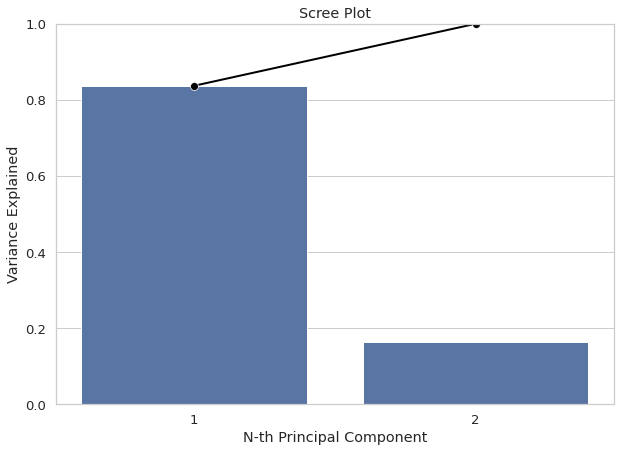

In [101]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [102]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 0.6731,  0.7395],
       [-0.7395,  0.6731]])

In [103]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['calories', 'rating']
                                )
pcsComponents_df

,PC1,PC2
calories,0.673142,-0.739513
rating,0.739513,0.673142


In [105]:
scores = pd.DataFrame(pcs.transform(df[['X6', 'X7']]),
                      columns=['x', 'y']
                      )
scores.head()

,x,y
0,2.935373,-0.055052
1,0.915946,2.163487
2,0.110062,0.077690
3,0.110062,0.077690
4,-0.563080,0.817203


In [106]:
scores.x.mean()

-1.8947806286936006e-18

In [107]:
scores.y.sum()

-1.1652900866465643e-12

In [108]:
scores.x.var() + scores.y.var()

2.696043416596108

In [109]:
df.X6.var() + df.X7.var()

2.6960434165961082

In [110]:
((scores.x.var()/
  (scores.x.var()+scores.y.var())
 )*100).round(0)

84.0

In [112]:
pcs = PCA()
pcs.fit(customers_default_payments_df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Standard deviation,155846.188861,37338.865667,27844.266356,21441.524438,20314.800613,18521.060369,17040.622246,16328.049834,11623.455093,10434.984690,...,9.200732e+00,2.257324e+00,9.433975e-01,7.681627e-01,7.329742e-01,5.967776e-01,5.120730e-01,4.725236e-01,4.186398e-01,3.858854e-01
Proportion of variance,0.848685,0.048717,0.027091,0.016064,0.014420,0.011986,0.010147,0.009316,0.004721,0.003805,...,2.958006e-09,1.780500e-10,3.109881e-11,2.061867e-11,1.877291e-11,1.244455e-11,9.162584e-12,7.801918e-12,6.124002e-12,5.203206e-12
Cumulative proportion,0.848685,0.897402,0.924493,0.940557,0.954978,0.966964,0.977111,0.986427,0.991147,0.994952,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Scree Plot

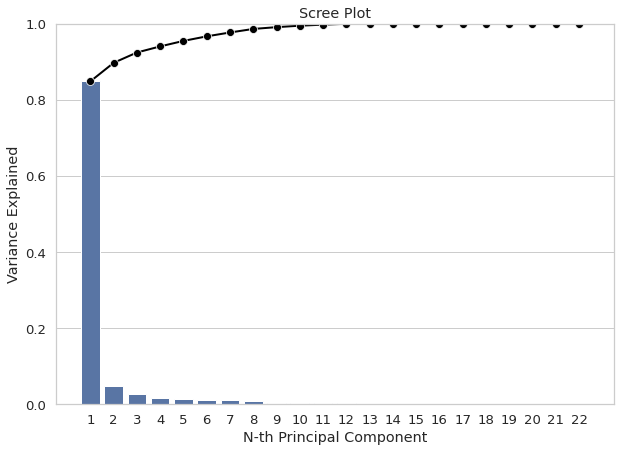

In [113]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [114]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]+pcsSummary_df.iloc[1][2]
#OR
((pcsSummary_df.iloc[2][2])*100).round(0)
#type(pcsSummary_df)

92.0

In [115]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]
#OR
((pcsSummary_df.iloc[2][1])*100).round(2)

89.74

In [116]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
Standard deviation,155846.1889,37338.8657,27844.2664,21441.5244,20314.8006,18521.0604,17040.6222,16328.0498,11623.4551,10434.9847,...,9.2007,2.2573,0.9434,0.7682,0.733,0.5968,0.5121,0.4725,0.4186,0.3859
Proportion of variance,0.8487,0.0487,0.0271,0.0161,0.0144,0.0120,0.0101,0.0093,0.0047,0.0038,...,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.8487,0.8974,0.9245,0.9406,0.9550,0.9670,0.9771,0.9864,0.9911,0.9950,...,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000


In [117]:
pcs.components_

array([[ 4.14763924e-08, -8.19842459e-08,  3.28648635e-06,
         1.37296785e-06,  1.81976900e-06,  1.80122511e-06,
         1.81894730e-06,  1.85059945e-06,  1.91446269e-06,
         4.46564614e-01,  4.40876931e-01,  4.29190770e-01,
         3.97475369e-01,  3.69455882e-01,  3.52646862e-01,
         2.49713944e-02,  2.83979937e-02,  2.38406863e-02,
         1.93439005e-02,  1.89953469e-02,  2.06234747e-02,
        -3.74534362e-08],
       [-1.31535982e-06, -2.67443623e-08, -1.77862764e-06,
        -1.19471868e-06, -1.49922488e-06, -3.83971863e-07,
         1.25856223e-06,  2.66404700e-06,  3.67350413e-06,
        -5.48882540e-01, -3.93876862e-01, -5.03369377e-02,
         2.57520562e-01,  4.24119764e-01,  4.79734737e-01,
         4.35456796e-02,  1.69332197e-01,  1.41885797e-01,
         1.00101304e-01,  6.19836300e-02, -1.23246264e-02,
         5.64571798e-08],
       [-3.61443865e-07, -6.52096907e-08,  3.65940622e-06,
        -3.94452205e-06, -4.19653198e-06, -3.31787763e-06,
    

In [118]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = customers_default_payments_df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
X3,4.147639e-08,-1.315360e-06,-3.614439e-07,-1.877246e-06,5.176662e-07
X4,-8.198425e-08,-2.674436e-08,-6.520969e-08,-2.313793e-08,-2.082281e-08
X5,3.286486e-06,-1.778628e-06,3.659406e-06,1.058339e-05,-1.840941e-06
X6,1.372968e-06,-1.194719e-06,-3.944522e-06,-8.168131e-06,1.924437e-06
X7,1.819769e-06,-1.499225e-06,-4.196532e-06,-7.856632e-06,2.309637e-06
X8,1.801225e-06,-3.839719e-07,-3.317878e-06,-8.949826e-06,8.257493e-07
X9,1.818947e-06,1.258562e-06,-1.278271e-06,-9.807269e-06,2.008021e-06
X10,1.850599e-06,2.664047e-06,-2.269910e-06,-8.505553e-06,-1.236853e-06
X11,1.914463e-06,3.673504e-06,-3.578189e-06,-6.813255e-06,8.569043e-07
X12,4.465646e-01,-5.488825e-01,-1.901878e-01,3.137959e-01,7.828899e-02


In [119]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = customers_default_payments_df.iloc[:, 3:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
X3,4.147639e-08,-1.315360e-06,-3.614439e-07,-1.877246e-06,5.176662e-07,-6.873092e-07,2.742598e-08,8.425372e-07,2.689951e-07,1.181499e-06,...,1.517606e-02,0.052884,-5.790480e-02,9.884696e-01,-9.784907e-02,-1.684922e-03,-1.598969e-02,7.922223e-02,7.792830e-04,-2.092865e-02
X4,-8.198425e-08,-2.674436e-08,-6.520969e-08,-2.313793e-08,-2.082281e-08,1.484774e-07,-3.785233e-07,-5.552804e-08,1.637817e-07,3.384221e-07,...,-2.351661e-02,0.002671,1.224705e-02,-7.985415e-02,6.982366e-03,6.645699e-03,-2.906603e-02,9.938214e-01,-7.965145e-03,-6.504619e-02
X5,3.286486e-06,-1.778628e-06,3.659406e-06,1.058339e-05,-1.840941e-06,-1.080465e-06,-2.499672e-06,2.154974e-06,-4.168256e-06,-2.385677e-06,...,9.994294e-01,0.018050,1.826362e-03,-1.777859e-02,1.990687e-03,-4.230198e-04,-4.592423e-04,2.215342e-02,-5.707168e-04,5.013631e-04
X6,1.372968e-06,-1.194719e-06,-3.944522e-06,-8.168131e-06,1.924437e-06,-1.875885e-06,8.985680e-07,3.209890e-07,3.401135e-06,4.394302e-06,...,-5.845803e-03,0.335802,-6.219609e-01,-1.143919e-01,-6.123451e-01,2.775882e-01,-1.400481e-01,3.629804e-03,-2.358847e-02,1.227882e-01
X7,1.819769e-06,-1.499225e-06,-4.196532e-06,-7.856632e-06,2.309637e-06,-2.744077e-06,8.294783e-07,-5.835151e-07,2.585978e-06,5.545291e-06,...,-8.079084e-03,0.422485,-4.234926e-01,-1.327648e-02,2.945162e-01,-5.792576e-01,4.552489e-01,1.913064e-02,1.095444e-01,4.712489e-03
X8,1.801225e-06,-3.839719e-07,-3.317878e-06,-8.949826e-06,8.257493e-07,3.528324e-06,2.667189e-07,-5.011474e-07,1.683638e-06,4.260059e-06,...,-8.442037e-03,0.440756,-1.037186e-01,1.927788e-02,5.671676e-01,1.487305e-01,-6.213974e-01,-2.225858e-02,-2.521856e-01,2.250491e-02
X9,1.818947e-06,1.258562e-06,-1.278271e-06,-9.807269e-06,2.008021e-06,7.578573e-07,1.378985e-06,-1.468132e-06,3.577560e-06,8.187115e-07,...,-7.793553e-03,0.434974,2.425068e-01,1.137344e-02,1.529821e-01,5.765262e-01,3.274186e-01,4.547767e-03,5.371833e-01,-1.490337e-02
X10,1.850599e-06,2.664047e-06,-2.269910e-06,-8.505553e-06,-1.236853e-06,-9.083279e-07,-5.606089e-07,-6.688561e-07,5.427006e-06,2.971147e-06,...,-8.185077e-03,0.410330,3.943670e-01,-1.155477e-02,-1.982262e-01,4.815868e-02,3.471935e-01,5.002568e-05,-7.163176e-01,2.522329e-02
X11,1.914463e-06,3.673504e-06,-3.578189e-06,-6.813255e-06,8.569043e-07,8.472270e-10,3.292202e-06,1.267619e-06,4.944089e-06,4.310138e-06,...,-7.652594e-03,0.388608,4.460463e-01,-3.825826e-02,-3.744666e-01,-4.790785e-01,-3.972176e-01,-1.343161e-02,3.474270e-01,-9.733565e-03
X12,4.465646e-01,-5.488825e-01,-1.901878e-01,3.137959e-01,7.828899e-02,-4.581892e-01,8.576915e-03,7.779003e-02,1.713131e-01,-2.669268e-01,...,-7.455572e-06,0.000005,2.019373e-06,-5.226899e-07,8.504026e-07,1.196105e-06,-1.329622e-06,-1.130054e-07,-2.671830e-07,-6.334047e-07


In [134]:
from sklearn import preprocessing

In [135]:
customers_default_payments_df.iloc[:, 3:].head()

,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [137]:
pcs = PCA()
pcs.fit(preprocessing.scale(customers_default_payments_df.iloc[:, 3:].dropna(axis=0))) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.

PCA()

In [138]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
Standard deviation,2.5549,1.9620,1.2460,1.2110,0.9827,0.9529,0.9418,0.9340,0.9283,0.8848,...,0.7623,0.6311,0.5101,0.4994,0.4346,0.3632,0.2650,0.2022,0.1590,0.1524
Proportion of variance,0.2967,0.1750,0.0706,0.0667,0.0439,0.0413,0.0403,0.0397,0.0392,0.0356,...,0.0264,0.0181,0.0118,0.0113,0.0086,0.0060,0.0032,0.0019,0.0011,0.0011
Cumulative proportion,0.2967,0.4717,0.5422,0.6089,0.6528,0.6941,0.7344,0.7740,0.8132,0.8488,...,0.9369,0.9550,0.9668,0.9782,0.9867,0.9927,0.9959,0.9978,0.9989,1.0000


In [139]:
pcsSummary_df.iloc[2,12]

0.936902552462156

In [141]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=customers_default_payments_df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:13]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
X3,0.023586,-0.078447,-0.316472,0.253329,0.358395,-0.232026,0.052816,0.098871,0.778591,0.034194,-0.005459,-0.122739,-0.101847
X4,-0.003970,-0.034026,0.468122,-0.433347,0.074505,-0.066477,0.045370,0.053489,0.324765,0.032380,-0.020927,-0.155290,0.667570
X5,0.011256,0.059548,-0.474522,0.441915,-0.042425,0.034588,-0.028348,-0.019717,-0.216196,0.023534,-0.019399,-0.076824,0.719685
X6,0.172755,-0.304254,-0.022021,0.011266,-0.240913,0.001266,0.057815,0.015965,0.141742,-0.014269,-0.007740,0.540457,0.093777
X7,0.206353,-0.335450,0.017397,0.038618,-0.080768,-0.075073,0.001905,-0.017831,0.050254,-0.000015,0.001659,0.418676,0.062636
X8,0.212440,-0.344052,0.062247,0.070136,0.042001,-0.057651,-0.000586,-0.027332,-0.038211,-0.023606,-0.110787,0.167327,0.031350
X9,0.218986,-0.344887,0.089931,0.093576,0.133802,-0.041306,-0.006504,0.000267,-0.123511,-0.050471,0.011626,-0.144840,-0.005446
X10,0.222333,-0.331086,0.109906,0.100523,0.169831,0.008219,-0.041365,0.000513,-0.153565,0.075882,0.041042,-0.307163,-0.041479
X11,0.216937,-0.303535,0.112101,0.097231,0.164264,0.042929,-0.124992,-0.050749,-0.140506,0.024264,0.057206,-0.362848,-0.042072
X12,0.329462,0.167462,-0.145469,-0.166038,-0.024120,-0.053715,0.029115,-0.055347,0.034061,0.011861,0.007475,0.049609,0.010746


In [142]:
pcsComponents_df.PC1.idxmax()

'X15'

In [143]:
pcsComponents_df.PC1.nlargest(3)

X15    0.348888
X16    0.346810
X14    0.344821
Name: PC1, dtype: float64

In [144]:
pcsComponents_df.PC2.idxmin()

'X9'

In [145]:
pcsComponents_df.PC2.nsmallest(3)

X9   -0.344887
X8   -0.344052
X7   -0.335450
Name: PC2, dtype: float64